## 221501138 - Sivabalan T
* Developed a linear regression model for forecasting time series data




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
data = {
    "date": pd.date_range(start="2025-01-01", periods=30, freq="D"),
    "temperature": [30 + i + np.random.normal(0, 1) for i in range(30)]  # Simulated increasing trend
}

In [4]:
df = pd.DataFrame(data)
df.set_index("date", inplace=True)
df

,temperature
date,
2025-01-01,31.535309
2025-01-02,30.676681
2025-01-03,31.441135
2025-01-04,34.208558
2025-01-05,34.981529
2025-01-06,36.086952
2025-01-07,36.710770
2025-01-08,36.354151
2025-01-09,39.070835


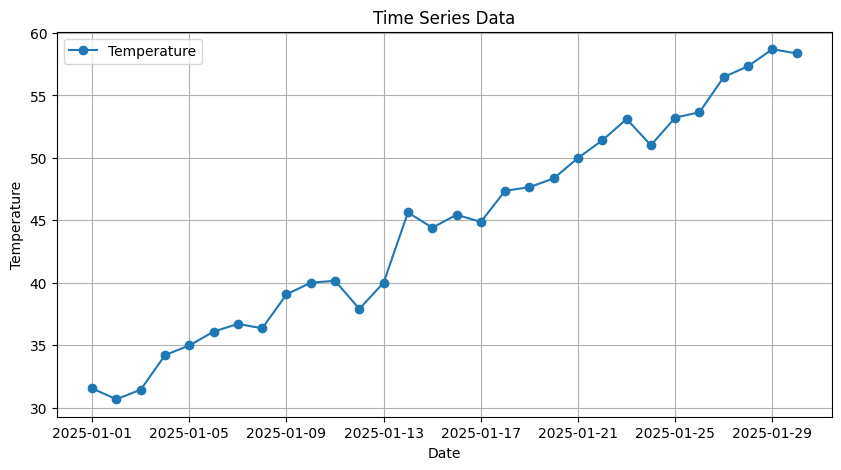

In [15]:
plt.figure(figsize=(10, 5))
plt.plot(df.index, df["temperature"], marker="o", linestyle="-", label="Temperature")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.title("Time Series Data")
plt.legend()
plt.grid()
plt.show()

In [16]:
df["previous_day_temp"] = df["temperature"].shift(1)

In [20]:
df.dropna(inplace=True)
df

,temperature,previous_day_temp
date,,
2025-01-02,30.676681,31.535309
2025-01-03,31.441135,30.676681
2025-01-04,34.208558,31.441135
2025-01-05,34.981529,34.208558
2025-01-06,36.086952,34.981529
2025-01-07,36.710770,36.086952
2025-01-08,36.354151,36.710770
2025-01-09,39.070835,36.354151
2025-01-10,40.009728,39.070835


In [21]:
x = df[["previous_day_temp"]]
y = df["temperature"]

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state= 42)

In [23]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [29]:
y_pred = model.predict(x_test)

In [30]:
y_pred

array([58.22561713, 45.68030429, 40.79466352, 53.96871496, 39.84228265,
       40.78680697])

In [31]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 5.94


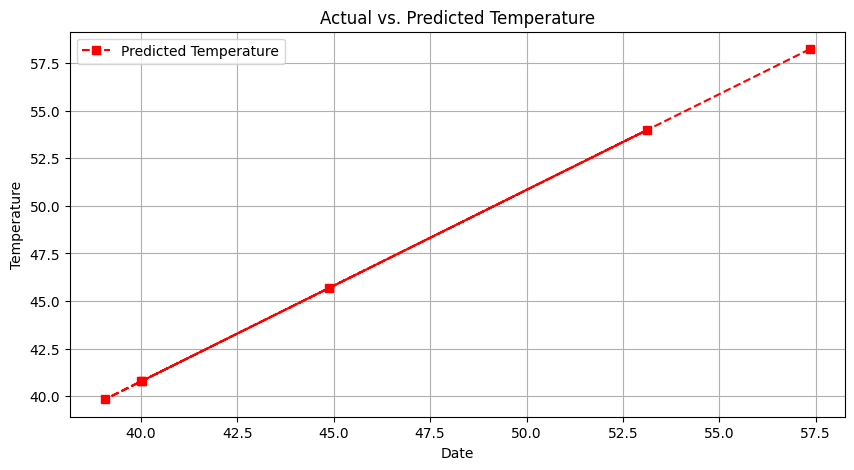

In [55]:
plt.figure(figsize=(10, 5))
plt.plot(x_test, y_pred, marker="s", linestyle="--", label="Predicted Temperature", color="red")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.title("Actual vs. Predicted Temperature")
plt.legend()
plt.grid()
plt.show()


In [50]:
y_test

,temperature
date,
2025-01-29,58.703305
2025-01-18,47.371149
2025-01-14,45.632211
2025-01-24,51.016974
2025-01-10,40.009728
2025-01-11,40.159141
